[(7.0710678118654755, 7.071067811865475), (14.142135623730951, 14.14213562373095), (21.213203435596427, 21.213203435596423), (24.14213562373095, 14.14213562373095), (31.213203435596427, 21.213203435596423), (24.14213562373095, 14.14213562373095), (28.284271247461902, 28.2842712474619), (17.071067811865476, 7.071067811865475), (17.071067811865476, 7.071067811865475), (24.14213562373095, -2.6645352591003757e-15), (31.213203435596427, 7.071067811865472), (34.14213562373095, 14.14213562373095), (31.213203435596423, -2.928932188134528), (41.21320343559643, 7.071067811865472), (38.2842712474619, -5.329070518200751e-15)]


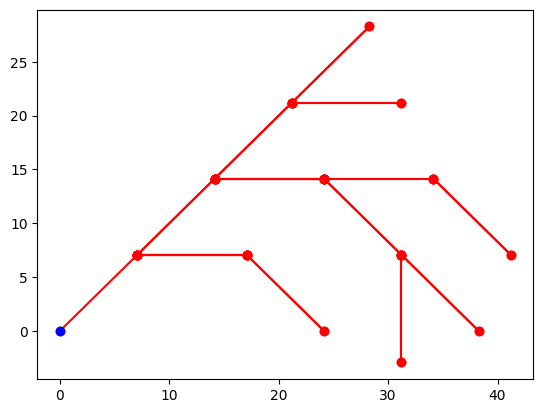

In [2]:
#food tree generator
#writing a code to generate a tree of objects that can be traversed from a root (nest)

#agent has 8 sensors, a food object must always be visible to at least one of the sensors

#pick a random number form 0 to 7
import random 
import math
num_sensors = 8

agent_pos = (0,0)
first_food = random.randint(0,7)
sensor_length = 10
#coordinate of first food 

angle = 2 * math.pi * first_food / num_sensors
x1 = agent_pos[0] + sensor_length * math.cos(angle)
y1 = agent_pos[1] + sensor_length * math.sin(angle)

food_coords = [(x1,y1)]


num_of_food = 15
#each food item is a node and each node can have children. track each node's children and what sensor was used to generate each child
food_children = {}
#keep track of viable parents. these are nodes with less than 3 children that can have more children. Also keep track of what sensor this was made on
viable_parents = [(x1,y1,first_food)]
edges = []

while len(food_coords) < num_of_food:
    #pick a random viable parent and update agent position as this coordinate and store the sensor that was used to generate this food
    _ = viable_parents[random.randint(0,len(viable_parents)-1)]
    agent_pos = (_[0], _[1])
    sensor = _[2]
    #if this parent has children, check if either sensors sensor, sensor+1 and sensor-1 are available and store them in a list
    available_sensors = []
    for i in range(-1,2):
        #check is sensor + i is occupied by any of the food object's children
        #iterate through food_children[agent_pos] and check if sensor + i is occupied
        occupied = False
        if agent_pos in food_children:
            for child in food_children[agent_pos]:
                if (child[2] + i) % num_sensors == sensor:
                    occupied = True
                    break
        if not occupied:
            available_sensors.append((sensor + i) % num_sensors)

    #if there are available sensors, pick one at random and generate a new food object
    if len(available_sensors) > 0:
        new_sensor = available_sensors[random.randint(0,len(available_sensors)-1)]
        angle = 2 * math.pi * new_sensor / num_sensors
        x1 = agent_pos[0] + sensor_length * math.cos(angle)
        y1 = agent_pos[1] + sensor_length * math.sin(angle)
        food_coords.append((x1,y1))
        edges.append((agent_pos,(x1,y1)))
        viable_parents.append((x1,y1,new_sensor))
        if agent_pos in food_children:
            food_children[agent_pos].append((x1,y1,new_sensor))
        else:
            food_children[agent_pos] = [(x1,y1,new_sensor)]
        edges.append((agent_pos,(x1,y1)))
        if len(food_children[agent_pos]) == 3:
            viable_parents.remove((agent_pos[0],agent_pos[1],sensor))
    
    
edges.append(((0,0), food_coords[0]))
print(food_coords)
    
    
import matplotlib.pyplot as plt
import numpy as np
for edge in edges:
    plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], 'ro-')
plt.plot(0,0,'bo')
plt.show()






In [4]:
from collections import defaultdict, deque

def compute_depths(edges, root):
    # Build adjacency list
    tree = defaultdict(list)
    for u, v in edges:
        tree[u].append(v)
        tree[v].append(u)  # Since it's an undirected tree

    # BFS to compute depths
    depths = {root: 0}  # Dictionary to store depth of each node
    queue = deque([root])

    while queue:
        node = queue.popleft()
        for neighbor in tree[node]:
            if neighbor not in depths:  # Avoid visiting the parent node
                depths[neighbor] = depths[node] + 1
                queue.append(neighbor)

    #return the sum of all the depths
    return sum(depths.values())

 
root = (0, 0)

depths = compute_depths(edges, root)
print(depths)


45


In [7]:
agent_pos

(7.071067811865474, -7.071067811865477, 7)

In [2]:
x = {1: (1,2,3)}

In [4]:
x = [(0,0), (1,1)]

In [5]:
x.remove((0,0))
x.remove((1,1))
x

[]

In [6]:
for bh in range(5):
    print(bh)

print("out", bh+1)

0
1
2
3
4
out 5
